# Análise dos Pares
Após identificar os pares em Cointegration.ipynb, é hora de analisar quais os melhores estão sinalizando entrada

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statistics
import matplotlib.pyplot as plt
%run Cointegration.py

# Funtions

In [2]:
def subshow(data, y_symbol, x_symbol, ax, period=250, title=''):
    y, x = getvalues_by_period(data[y_symbol], data[x_symbol], period)
    model= model_ols(y, x)
    result = zscore(model.resid)
    std = result.std()
    result.plot(ax=ax)
    #ax.plot(result)
    if(title == ''):
        ax.set_title('{} / {}'.format(y_symbol, x_symbol))
    else:
        ax.set_title(title)
    ax.margins(0.1)
    ax.set_xlabel('')

    ax.axhline(0, color='black',label='mean')
    ax.axhline(2*std, color='red', linestyle='--', linewidth=2)
    ax.axhline(-2*std, color='green', linestyle='--', linewidth=2)

In [3]:
path_data_cart = 'datasets/data_cart.csv'

In [13]:
data = pd.read_csv(path_data_cart, index_col=0)
pairs = pd.read_csv('datasets/cointegrated_pairs.csv')

print('{} to {}'.format(data.index[0], data.index[-1]))
print('data: {}'.format(data.shape))
print('pairs: {}'.format(pairs.shape))

12/04/2019 to 26/06/2020
data: (300, 71)
pairs: (312, 13)


Procura pares que estão quase no ponto de entrada 95% de distância da média e 5% próximo da zona -2 e +2

In [53]:
pairs_signal = pairs.loc[(pairs['Signal'] >= 0.95)].copy()
pairs_signal.reset_index(drop=True, inplace=True)
pairs_signal.shape

(8, 13)

In [54]:
signal2 = pd.read_csv('datasets/sinais/sinais_25062020.csv')

In [55]:
pairs_signal = pairs_signal.loc[(pairs_signal['PeriodQt'] > 2)].sort_values(by=['HalfLife'], ascending=True).copy()
pairs_signal.reset_index(drop=True, inplace=True)
pairs_signal

,Period,Dependente,Independente,Dickey-Fuller,ADF,Beta,HalfLife,Hurst,Corr,Signal,SignalStr,PeriodQt,PeriodStr
0,250,CPFE3,ENGI11,0.000094,99,0.564880,5,0.226434,0.954111,1.110346,Long/Short,9,"100,120,140,160,180,200,220,240,250"
1,250,CYRE3,LREN3,0.010324,95,0.791469,5,0.275411,0.963727,1.184884,Short/Long,9,"100,120,140,160,180,200,220,240,250"
2,250,B3SA3,BPAC11,0.041758,95,0.281372,8,0.339061,0.824582,0.988170,Short/Long,5,"100,200,220,240,250"
3,250,B3SA3,SBSP3,0.024049,95,0.494425,8,0.244095,0.812388,1.301807,Short/Long,3,"220,240,250"
4,250,BRAP4,TAEE11,0.017235,95,2.045478,8,0.311625,0.808437,0.986839,Short/Long,6,"160,180,200,220,240,250"
5,250,IGTA3,USIM5,0.040829,95,4.352774,9,0.288569,0.933737,1.531298,Long/Short,3,"220,240,250"
6,250,CYRE3,SBSP3,0.028656,95,0.712322,13,0.232076,0.903395,0.952527,Long/Short,3,"220,240,250"


In [9]:
signal2

,Period,Dependente,Independente,Dickey-Fuller,ADF,Beta,HalfLife,Hurst,Corr,Signal,SignalStr,PeriodQt,PeriodStr
0,250,CPFE3,ENGI11,0.000110,99,0.565238,5,0.222963,0.954954,1.230435,Long/Short,9,"100,120,140,160,180,200,220,240,250"
1,250,AZUL4,BBSE3,0.000638,99,3.649069,6,0.235455,0.960502,1.150709,Long/Short,9,"100,120,140,160,180,200,220,240,250"
2,250,CCRO3,LREN3,0.022936,95,0.296894,6,0.263365,0.936931,1.317102,Short/Long,8,"120,140,160,180,200,220,240,250"
3,250,CYRE3,LREN3,0.017950,95,0.793978,6,0.268593,0.964034,1.539623,Short/Long,7,"100,120,140,160,180,240,250"
4,250,B3SA3,BPAC11,0.038665,95,0.280677,8,0.342132,0.824397,1.070084,Short/Long,4,"100,200,240,250"
5,250,B3SA3,SBSP3,0.027074,95,0.494047,8,0.244627,0.815042,1.338566,Short/Long,3,"220,240,250"
6,250,LREN3,USIM5,0.034321,95,3.768021,8,0.301038,0.914920,1.000032,Long/Short,9,"100,120,140,160,180,200,220,240,250"
7,250,BRAP4,TAEE11,0.017302,95,2.040366,8,0.312501,0.809719,1.007975,Short/Long,6,"160,180,200,220,240,250"
8,250,RENT3,SBSP3,0.002740,99,0.837853,8,0.181899,0.898133,1.107450,Long/Short,9,"100,120,140,160,180,200,220,240,250"
9,250,IGTA3,USIM5,0.027852,95,4.342554,8,0.287463,0.935367,1.415268,Long/Short,4,"200,220,240,250"


In [50]:
analysis_by_periods(data['B3SA3'], data['BPAC11'])

,Period,Stationary,Dickey-Fuller,ADF,Beta,HalfLife,Hurst,Corr
0,100,True,0.017588,95.0,0.355027,4,0.217557,0.937940
1,120,False,0.080081,90.0,0.286714,6,0.314642,0.862578
2,140,False,0.138987,NaN,0.270695,8,0.352310,0.851109
3,160,False,0.085206,90.0,0.276720,7,0.367404,0.852074
4,180,False,0.063857,90.0,0.276610,8,0.365177,0.848168
5,200,True,0.034661,95.0,0.275581,7,0.360306,0.846514
6,220,True,0.019009,95.0,0.273978,7,0.352993,0.844336
7,240,True,0.034026,95.0,0.275024,7,0.345978,0.829624
8,250,True,0.041758,95.0,0.281372,8,0.339061,0.824582


In [51]:
y, x = getvalues_by_period(data['B3SA3'], data['BPAC11'], 250)

In [52]:
signal(y, x)

['Short/Long', 5.128412154017241, 0.9881697787966977]

In [49]:
result.resid.iloc[-1]

5.128412154017241

In [45]:
result = model_ols(y, x)
result.params

const     27.874321
BPAC11     0.281372
dtype: float64

In [47]:
result.resid

Data
26/06/2019   -4.761524
27/06/2019   -4.268484
28/06/2019   -4.730503
01/07/2019   -3.806964
02/07/2019   -4.418219
                ...   
22/06/2020    1.074259
23/06/2020    2.329271
24/06/2020    3.194485
25/06/2020    5.488211
26/06/2020    5.128412
Length: 250, dtype: float64

In [43]:
spred = y-(27.874321+0.281372*x)
spred

Data
26/06/2019   -4.761549
27/06/2019   -4.268509
28/06/2019   -4.730528
01/07/2019   -3.806990
02/07/2019   -4.418244
                ...   
22/06/2020    1.074221
23/06/2020    2.329232
24/06/2020    3.194447
25/06/2020    5.488172
26/06/2020    5.128376
Length: 250, dtype: float64

In [46]:
result.resid.std()

2.5949043697036296

In [33]:
#data[['B3SA3', 'BPAC11']].to_excel('datasets/test.xlsx')

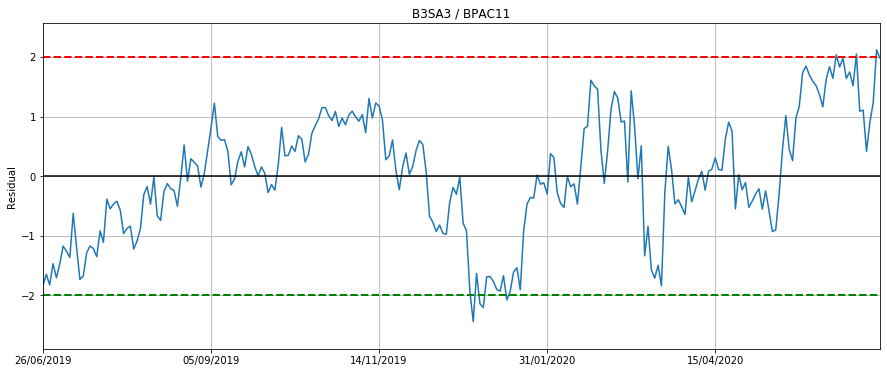

In [58]:
show(data, 'B3SA3', 'BPAC11')

In [59]:
#signal.to_csv('datasets/sinais/sinais_25062020.csv', index=False)

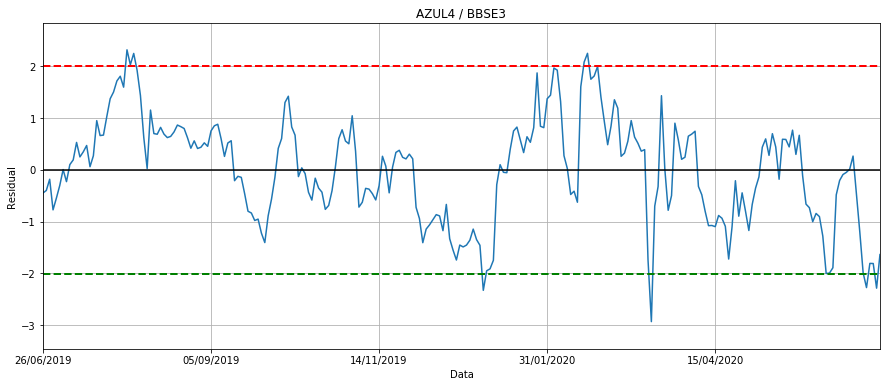

In [82]:
show(data, 'AZUL4', 'BBSE3')

### Plota todos os sinais

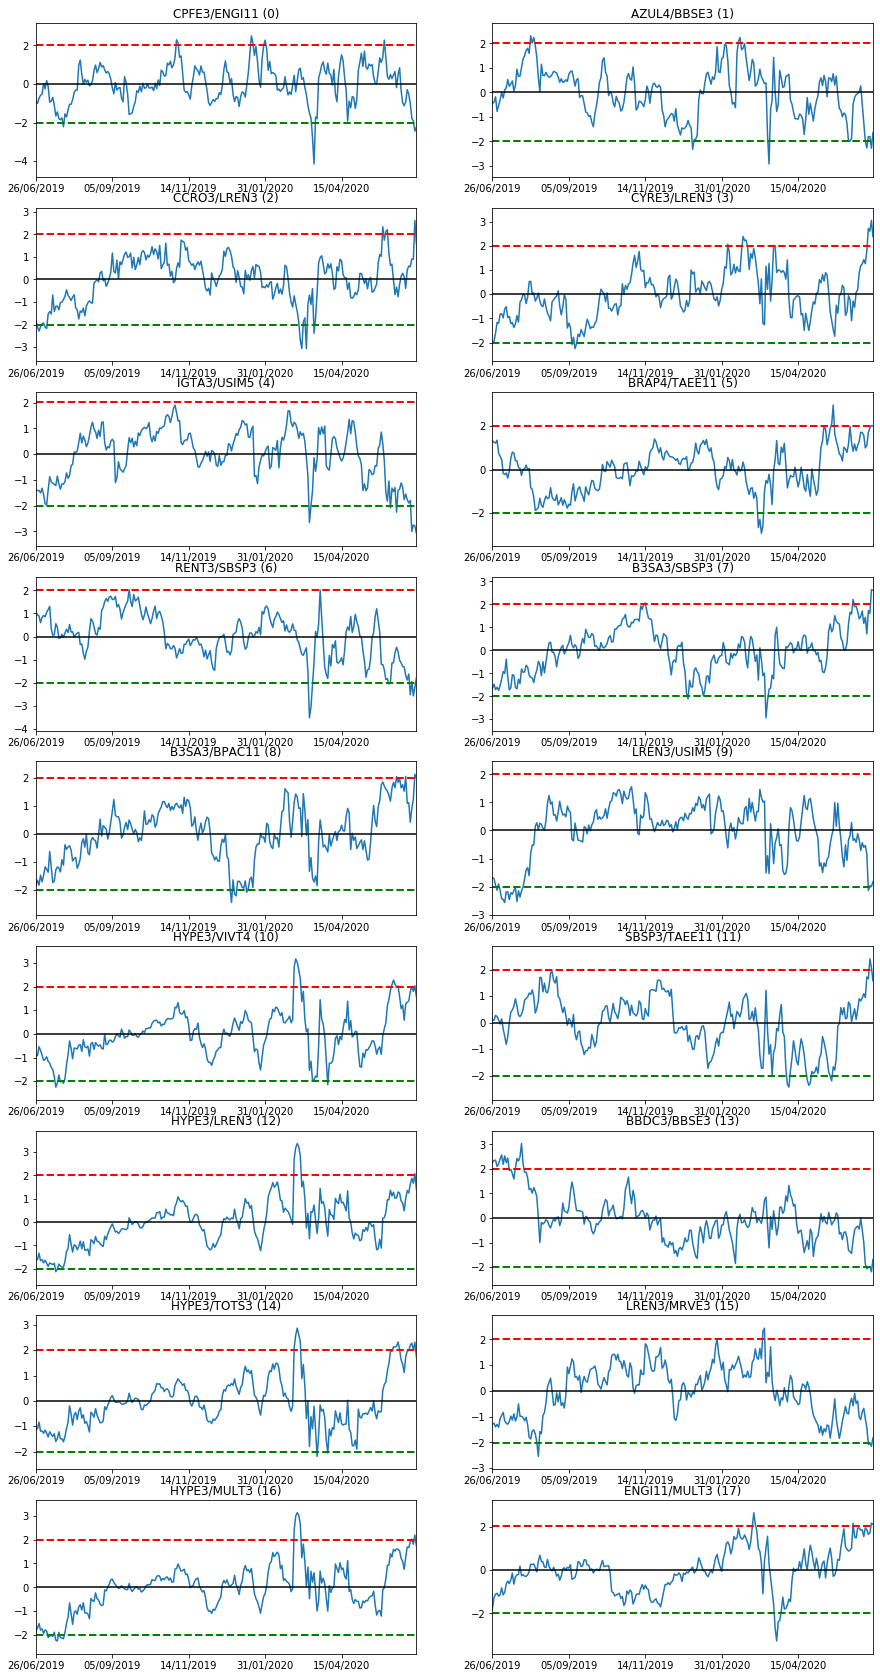

In [83]:
fig2, axes = plt.subplots(nrows=int((pairs_signal.shape[0]/2)), ncols=2, figsize=(15, 30))
for i, ax in enumerate(axes.flatten()):
    row = pairs_signal.iloc[i]
    y_symbol = row['Dependente']
    x_symbol = row['Independente']
    
    subshow(data, y_symbol, x_symbol, ax, title='{}/{} ({})'.format(y_symbol, x_symbol, i))
    #plt.tight_layout()

Visualiza todos os gráficos de df signal

#### Verifica movimento do par nos últimos 8 dias

In [78]:
"""y_symbol = 'AZUL4'
x_symbol = 'BBSE3'

index = len(data)-8
fig2, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 13))
for i, ax in enumerate(axes.flatten()):
    index+=1
    last_data = data.iloc[:index].copy()
    label = last_data.index[-1]
    subshow(last_data, y_symbol, x_symbol, ax, title=label)"""

"y_symbol = 'AZUL4'\nx_symbol = 'BBSE3'\n\nindex = len(data)-8\nfig2, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 13))\nfor i, ax in enumerate(axes.flatten()):\n    index+=1\n    last_data = data.iloc[:index].copy()\n    label = last_data.index[-1]\n    subshow(last_data, y_symbol, x_symbol, ax, title=label)"

# Análise das operações abertas

In [63]:
oper_22062020 = pd.read_csv('datasets/oper/22062020.csv')
oper_22062020

,Period,Dependente,Independente,Dickey-Fuller,ADF,Beta,HalfLife,Hurst,Corr,Signal,SignalStr,PeriodQt,PeriodStr
0,250,AZUL4,BBSE3,0.000273,99,3.624776,5,0.239819,0.962281,1.066906,Long/Short,9,"100,120,140,160,180,200,220,240,250"
1,250,BBDC3,SANB11,0.019923,95,0.736223,8,0.297370,0.987493,1.004259,Long/Short,4,"200,220,240,250"
2,250,ENGI11,MULT3,0.027359,95,0.939998,11,0.399600,0.862502,1.045645,Short/Long,3,"220,240,250"


In [64]:
"""excel = data[293:][['AZUL4', 'BBSE3']].copy()
excel = excel.iloc[::-1]
excel[0:10].to_excel('datasets/test.xlsx')"""

"excel = data[293:][['AZUL4', 'BBSE3']].copy()\nexcel = excel.iloc[::-1]\nexcel[0:10].to_excel('datasets/test.xlsx')"

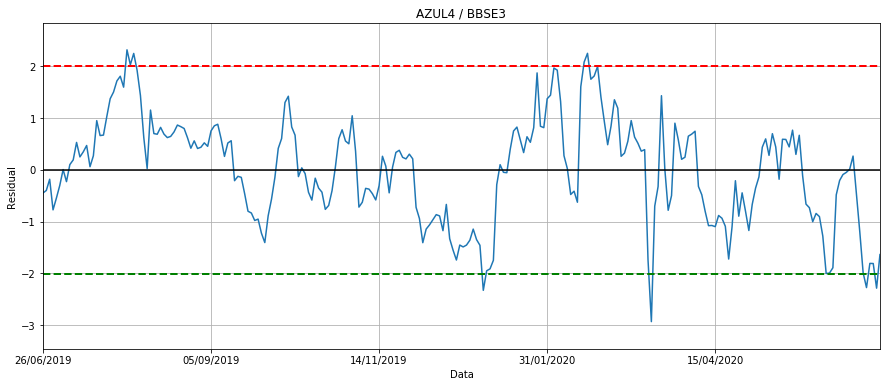

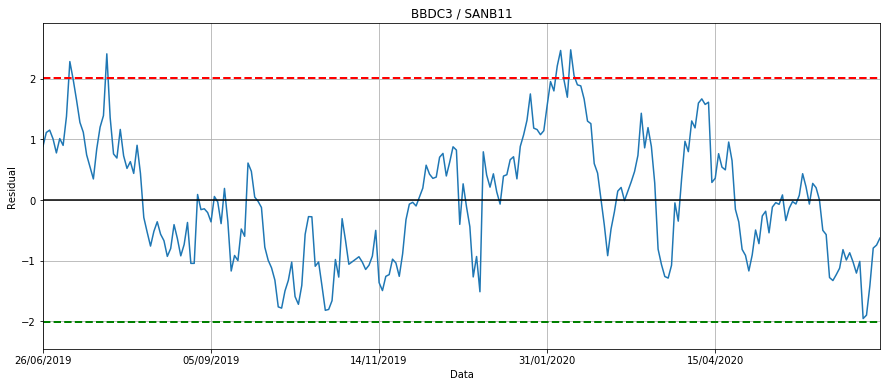

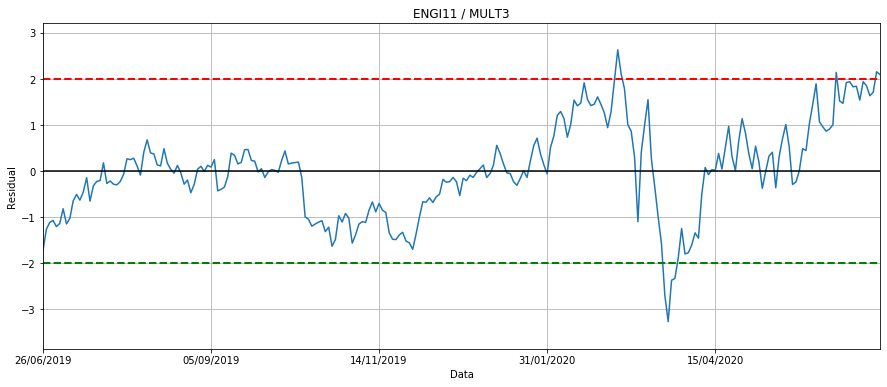

In [65]:
show(data, 'AZUL4', 'BBSE3')
show(data, 'BBDC3', 'SANB11')
show(data, 'ENGI11', 'MULT3')

In [66]:
result = model_ols(data['BBDC3'], data['SANB11'])
result.params

const    -1.104315
SANB11    0.733522
dtype: float64

In [67]:
result.resid[::-1][0:4]

Data
26/06/2020   -0.603700
25/06/2020   -0.713870
24/06/2020   -0.764445
23/06/2020   -1.368711
dtype: float64

In [68]:
dfres = pd.DataFrame()
dfres['resid'] = result.resid

In [69]:
dfres['mean'] = result.resid.rolling(window=21, center=False).mean()
dfres.fillna(value=0, inplace=True)

In [70]:
dfres['%'] = (dfres['mean'] / dfres['resid'])-1
dfres[284:]

,resid,mean,%
Data,,,
04/06/2020,-1.234097,-0.136761,-0.889181
05/06/2020,-1.280227,-0.185115,-0.855405
08/06/2020,-1.180453,-0.232487,-0.803052
09/06/2020,-1.077704,-0.258363,-0.760265
10/06/2020,-0.783409,-0.289824,-0.630048
12/06/2020,-0.952665,-0.332712,-0.650757
15/06/2020,-0.837882,-0.368982,-0.559625
16/06/2020,-0.982750,-0.419239,-0.573402
17/06/2020,-1.160199,-0.458472,-0.604834


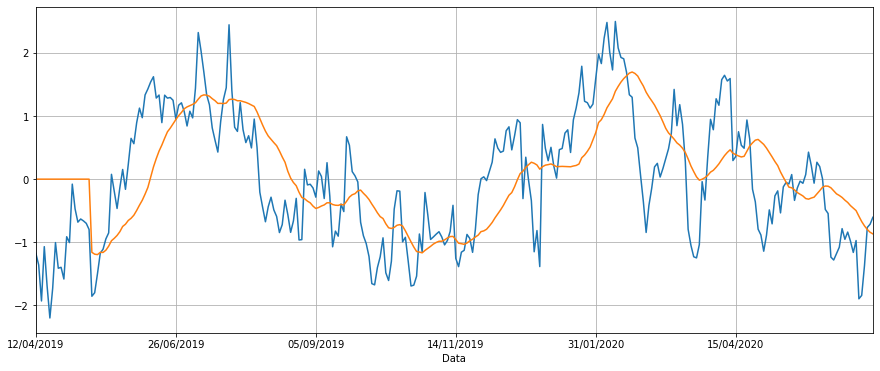

In [71]:
plt.figure(figsize=(15, 6))
dfres['resid'].plot()
dfres['mean'].plot()
plt.grid(True)

In [72]:
#data[['BBDC3', 'SANB11']].to_excel("datasets/BBDC3_SANB11_bug.xlsx")

In [73]:
y_symbol = 'AZUL4'
x_symbol = 'BBSE3'

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


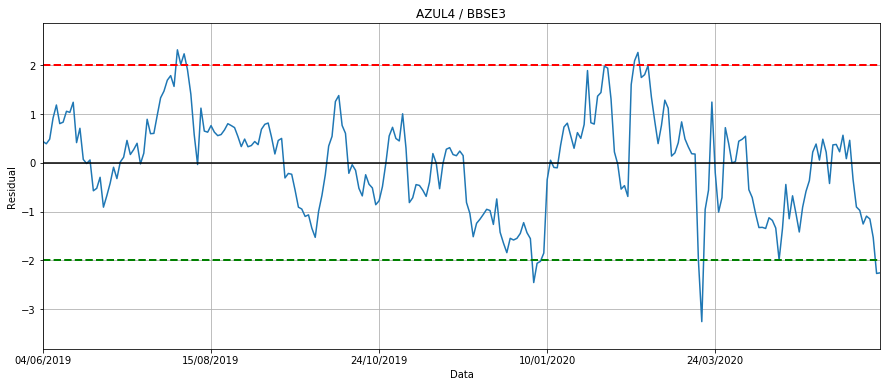

In [74]:
test = data[0:285]
show(test, y_symbol, x_symbol)

In [75]:
#data[[y_symbol, x_symbol]][284:][::-1].to_excel('datasets/test.xlsx')#03/06/2020

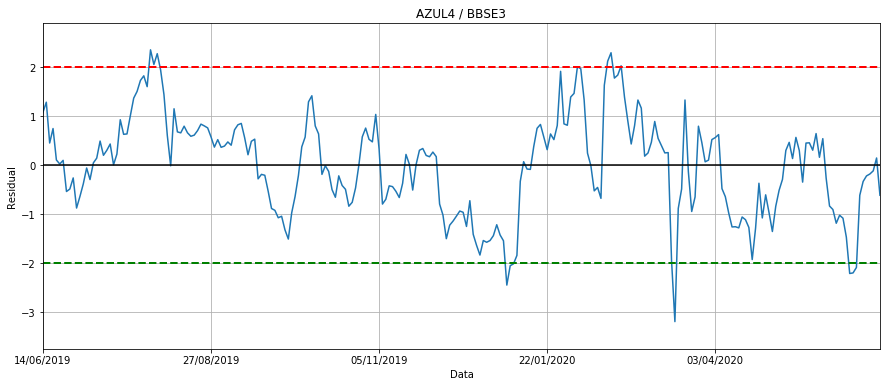

In [76]:
test = data[0:293]
show(test, y_symbol, x_symbol)

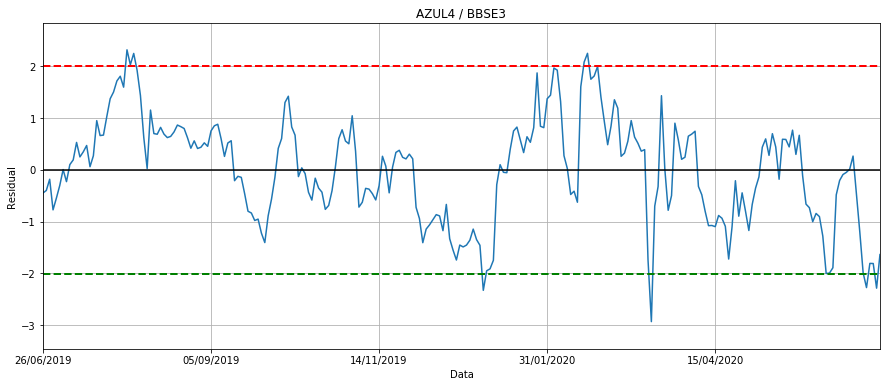

In [77]:
show(data, y_symbol, x_symbol)